In [73]:
import numpy as np  
import pandas as pd  
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
import ssl
ssl._create_default_https_context = ssl._create_unverified_context  #ssl認證，這兩句可以讓他不用再進行ssl認證
import matplotlib.pyplot as plt  

In [74]:
from keras.datasets import mnist 

In [75]:
#MNIST
(X_train_image, y_train_label), (X_test_image, y_test_label) = mnist.load_data()  

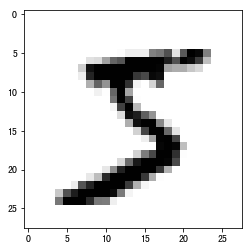

In [76]:
#訓練資料是由 images 與 labels 所組成共有 60,000 筆, 每一筆代表某個數字的影像為 28x28 pixels.
plt.imshow(X_train_image[0], cmap='binary')

In [77]:
y_train_label[0]

5

In [78]:
x_train = X_train_image.reshape(60000, 28*28).astype('float32')  
x_test = X_test_image.reshape(10000, 28*28).astype('float32')  

In [79]:
# Normalization  
x_train = x_Train/255  
x_test= x_Test/255 

In [80]:
#One-hot-encoding 將之轉換為 10 個 0 或 1 的組合
y_train = keras.utils.to_categorical(y_train_label,10)
y_test = keras.utils.to_categorical(y_test_label, 10)

In [81]:
#Model  ,500 Neural
model=Sequential()
model.add(Dense(input_dim=28*28, output_dim=500, activation='sigmoid'))
model.add(Dense(output_dim=500, activation='sigmoid'))
model.add(Dense(output_dim=10,activation='softmax'))


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="sigmoid", units=500)`
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=500)`
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  """


In [82]:
model.summary()
#dense 1. 500 layer , param = 28*28*500+500
#dense 2. 500 layer , param = 500*500+500
#dense 3. 10 layer , param =500*10+10
# total params  = dense 1+ dense 2 + dense3

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_11 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5010      
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [83]:
#評估模型
#loss = ('cateqorical crossentropy')
#optimizer #優化器(SGD, RMSprop, Adagrad, Adadelta,Adam,Adamax,Nadam) 
#metrics #指標
#=====Tip==========
#loss: 設定 loss function, 在深度學習通常使用 cross_entropy (Cross entropy) 交叉摘順練效果較好.
# optimizer: 設定訓練時的優化方法, 在深度學習使用 adam 可以讓訓練更快收斂, 並提高準確率.
# metrics: 設定評估模型的方式是 accuracy (準確率)
#=================
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [84]:
batch_size = 100 #每一批次的訓練筆數 
epochs = 10 #執行 10 次的訓練週期
validation_split =2  # 是否分測試與驗證 （600000，分 48000測，12000 驗）
verbose = 2 # 顯示訓練過程. 共執行10次epoch(訓練週期),每批100筆,也就是每次會有600round (48,000 / 100 = 480).
            #每一次的 epoch 會計算 accuracy 並記錄在 儲存的記錄 中.
train_history = model.fit(x_train, y_train,
                    validation_split=0.2,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 7s - loss: 2.3141 - accuracy: 0.1196 - val_loss: 2.2641 - val_accuracy: 0.0914
Epoch 2/10
 - 7s - loss: 1.8716 - accuracy: 0.3496 - val_loss: 1.3731 - val_accuracy: 0.5304
Epoch 3/10
 - 7s - loss: 1.0809 - accuracy: 0.6260 - val_loss: 0.8735 - val_accuracy: 0.7064
Epoch 4/10
 - 7s - loss: 0.8185 - accuracy: 0.7170 - val_loss: 0.7115 - val_accuracy: 0.7565
Epoch 5/10
 - 7s - loss: 0.6937 - accuracy: 0.7705 - val_loss: 0.6064 - val_accuracy: 0.7972
Epoch 6/10
 - 7s - loss: 0.5974 - accuracy: 0.8101 - val_loss: 0.5097 - val_accuracy: 0.8477
Epoch 7/10
 - 7s - loss: 0.5338 - accuracy: 0.8318 - val_loss: 0.4879 - val_accuracy: 0.8505
Epoch 8/10
 - 7s - loss: 0.4960 - accuracy: 0.8472 - val_loss: 0.4502 - val_accuracy: 0.8658
Epoch 9/10
 - 7s - loss: 0.4678 - accuracy: 0.8578 - val_loss: 0.4337 - val_accuracy: 0.8695
Epoch 10/10
 - 7s - loss: 0.4574 - accuracy: 0.8590 - val_loss: 0.4206 - val_accuracy: 0.8758


In [88]:
train_history.history

{'val_loss': [2.2640666127204896,
  1.3731172243754068,
  0.8734757721424102,
  0.7114550210535526,
  0.606385696431001,
  0.509657346829772,
  0.48793958909809587,
  0.450240146741271,
  0.43372313529253004,
  0.420598539772133],
 'val_accuracy': [0.09141666442155838,
  0.5304166674613953,
  0.706416666507721,
  0.7565000057220459,
  0.797249972820282,
  0.8476666808128357,
  0.8504999876022339,
  0.8657500147819519,
  0.8694999814033508,
  0.8758333325386047],
 'loss': [2.3141209175189337,
  1.871589000771443,
  1.0808581521113714,
  0.8185314317544301,
  0.6937401942908764,
  0.5973776575177908,
  0.5337721175203721,
  0.49601347281908,
  0.46777106759448844,
  0.4574325968200962],
 'accuracy': [0.119645834,
  0.3495625,
  0.62602085,
  0.71697915,
  0.7705,
  0.8100625,
  0.83177084,
  0.8472292,
  0.85779166,
  0.8590208]}

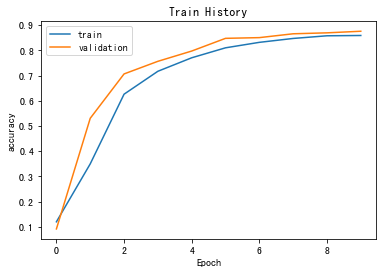

In [91]:
#accuray , 兩者的正確率都有持續往上，但到可能後面好像就沒那麼明顯
plt.plot(train_history.history['accuracy'])  
plt.plot(train_history.history['val_accuracy'])  
plt.title('Train History')  
plt.ylabel('accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()  

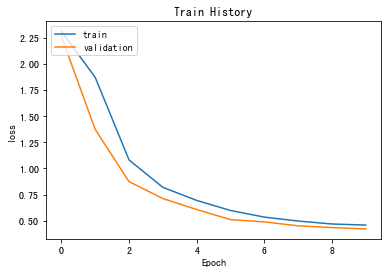

In [93]:
#loss, 誤差有愈來愈小，但和accuracy一樣好像後面就不再下降了
#驗證組的誤差一直都比測試組好
plt.plot(train_history.history['loss'])  
plt.plot(train_history.history['val_loss'])  
plt.title('Train History')  
plt.ylabel('loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show() 

In [95]:
scores = model.evaluate(x_test, y_test)  #拿剩下的測試來看看準確率 

10000/10000 [==============================] - 1s 80us/step


In [96]:
print("Total loss on Testing Set:", score[0])
print("Accuracy of Testing Set:", score[1])

Total loss on Testing Set: 0.3781292914867401
Accuracy of Testing Set: 0.8859999775886536


In [97]:
prediction = model.predict_classes(x_Test)

In [98]:
for i in range(len(prediction)):  
    if prediction[i] != y_test_label[i]:  
        print("\tAt %d'th: %d is with wrong prediction as %d!" % (i, y_test_label[i], prediction[i]))  

	At 8'th: 5 is with wrong prediction as 6!
	At 11'th: 6 is with wrong prediction as 2!
	At 15'th: 5 is with wrong prediction as 3!
	At 18'th: 3 is with wrong prediction as 2!
	At 20'th: 9 is with wrong prediction as 7!
	At 24'th: 4 is with wrong prediction as 9!
	At 33'th: 4 is with wrong prediction as 0!
	At 38'th: 2 is with wrong prediction as 3!
	At 42'th: 4 is with wrong prediction as 9!
	At 54'th: 6 is with wrong prediction as 2!
	At 62'th: 9 is with wrong prediction as 8!
	At 63'th: 3 is with wrong prediction as 2!
	At 65'th: 4 is with wrong prediction as 8!
	At 66'th: 6 is with wrong prediction as 2!
	At 73'th: 9 is with wrong prediction as 7!
	At 78'th: 9 is with wrong prediction as 8!
	At 87'th: 3 is with wrong prediction as 0!
	At 92'th: 9 is with wrong prediction as 8!
	At 97'th: 7 is with wrong prediction as 8!
	At 111'th: 7 is with wrong prediction as 1!
	At 119'th: 2 is with wrong prediction as 8!
	At 124'th: 7 is with wrong prediction as 9!
	At 132'th: 5 is with wrong pr

	At 9429'th: 3 is with wrong prediction as 8!
	At 9446'th: 2 is with wrong prediction as 4!
	At 9465'th: 5 is with wrong prediction as 3!
	At 9468'th: 3 is with wrong prediction as 2!
	At 9479'th: 3 is with wrong prediction as 2!
	At 9482'th: 5 is with wrong prediction as 3!
	At 9492'th: 4 is with wrong prediction as 9!
	At 9497'th: 9 is with wrong prediction as 8!
	At 9502'th: 4 is with wrong prediction as 9!
	At 9507'th: 9 is with wrong prediction as 8!
	At 9512'th: 4 is with wrong prediction as 9!
	At 9513'th: 5 is with wrong prediction as 8!
	At 9530'th: 9 is with wrong prediction as 8!
	At 9538'th: 4 is with wrong prediction as 9!
	At 9541'th: 4 is with wrong prediction as 9!
	At 9550'th: 4 is with wrong prediction as 9!
	At 9559'th: 3 is with wrong prediction as 2!
	At 9560'th: 7 is with wrong prediction as 8!
	At 9587'th: 9 is with wrong prediction as 4!
	At 9594'th: 1 is with wrong prediction as 8!
	At 9595'th: 2 is with wrong prediction as 8!
	At 9606'th: 5 is with wrong predi

Text(0.5, 1.0, 'lable=6,pred=2')

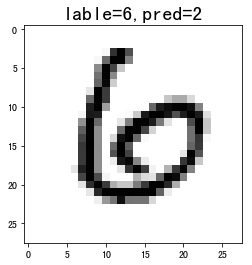

In [106]:
# 拉一個錯的出來看看 , 第11筆裡 6 可以判斷成2 
plt.imshow(X_test_image[11], cmap='binary')
title = "lable={},pred={}".format(str(y_test_label[11]), str(prediction[11])) 
plt.title(title, fontsize=20)  
 